<a href="https://colab.research.google.com/github/IsaacLaaouaj/Analisis-Exploratorio-de-Datos-EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de los datos:

Los 3 archivos contienen información relativa a los clientes de la compañía telefónica en el año 2023.

- Clients: contiene información sociodemográfica de los clientes a fecha 2023-10-31
- Billing: contiene la facturación emitida a los clientes en todo el año 2023
- Tenure: contiene la información relativa a los compromisos de permanencia durante el año 2023.

In [ ]:
import pandas as pd

df_clients = pd.read_parquet('confidencial')
df_billing = pd.read_csv('confidencial', sep = ";")
df_tenure = pd.read_json('confidencial')

# 1. Datos de los clientes

## 1.1 Limpieza "Clients"

**Clients**: Contiene información sociodemográfica de los clientes a fecha 2023-10-31


In [ ]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11269 entries, 0 to 11268
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        11269 non-null  object        
 1   gender            11238 non-null  object        
 2   paperlessbilling  11242 non-null  object        
 3   paymentmethod     11241 non-null  object        
 4   children          11269 non-null  int64         
 5   contract_date     11236 non-null  datetime64[ns]
 6   married           11235 non-null  object        
 7   birth_date        11269 non-null  datetime64[ns]
 8   churn_date        2958 non-null   datetime64[ns]
 9   country           11269 non-null  object        
 10  zipcode           11264 non-null  object        
 11  contract_channel  2753 non-null   object        
dtypes: datetime64[ns](3), int64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
df_clients.describe(include = "all")

<ipython-input-30-caba274658b7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_clients.describe(include = "all")
<ipython-input-30-caba274658b7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_clients.describe(include = "all")
<ipython-input-30-caba274658b7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_clients.describe(include = "all")


,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,birth_date,churn_date,country,zipcode,contract_channel
count,11269,11238,11242,11241,11269.000000,11236,11235,11269,2958,11269,11264,2753
unique,11269,2,2,4,NaN,1997,2,8849,196,2,6328,3
top,3d40ba9d86cc7b97612628a924cd63bc,Male,Yes,Electronic check,NaN,2022-12-27 00:00:00,No,1995-08-02 00:00:00,2023-06-09 00:00:00,ES,35016,Phone
freq,1,5683,6626,3747,NaN,47,5813,5,28,11264,6,1072
first,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,1934-01-12 00:00:00,2023-03-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2023-01-28 00:00:00,NaN,2011-12-28 00:00:00,2023-09-28 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.447067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.738759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos obvervar que tenemos valores unicos en todas las filas de la columna "cosumerid", por lo tanto podemos asegurar que tenemos en total 11,269 clientes en la compañia.

En la columna "gender", se observa un bajo número de valores nulos. Propongo una mejora: La creación de una nueva categoría denominada "otros". Esta inclusión permitiría una mayor representatividad, dado que es posible que algunos individuos no hayan respondido debido a que las opciones de género tradicionales, como masculino y femenino, no reflejan su identidad.

In [ ]:
df_clients['gender'].fillna('others', inplace=True)

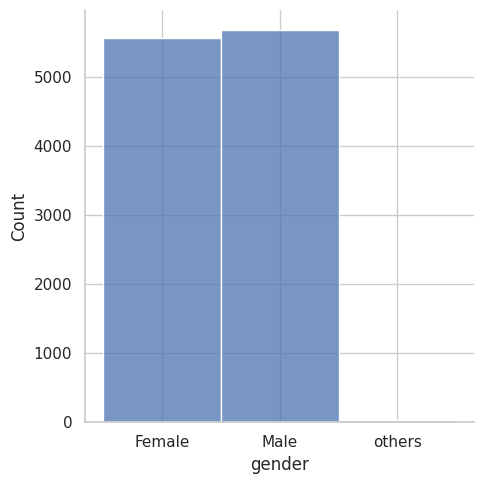

In [ ]:
import seaborn as sns
sns.displot(df_clients['gender'])

En las columnas "married", "paperlessbilling" y "paymentmethod" dado que disponen de pocos valores nulos (27 nulos en paperlessbilling, 28 en paymentmethod y 34 en married) he decidido imputarles la moda debido a que quiero conservar la tendencia que disponen al completar los datos faltantes. De esta manera, garantizamos cierta coherencia en la información.

Además, al tratarse de columnas que representan respuestas 'Yes' o 'No', asigno el valor '1' a 'Yes' y '0' a 'No'. Esto nos permite preparar los datos para su posible uso futuro en el entrenamiento de un modelo de inteligencia artificial u otros propósitos similares.

Asignamos la moda en la columna paperlessbilling y asignamos valores binarios:

In [ ]:
moda_paperlessbilling = df_clients['paperlessbilling'].mode()[0]
df_clients['paperlessbilling'].fillna(moda_paperlessbilling, inplace=True)

df_clients['paperlessbilling'].replace({'Yes': 1, 'No': 0}, inplace=True)

<Axes: >

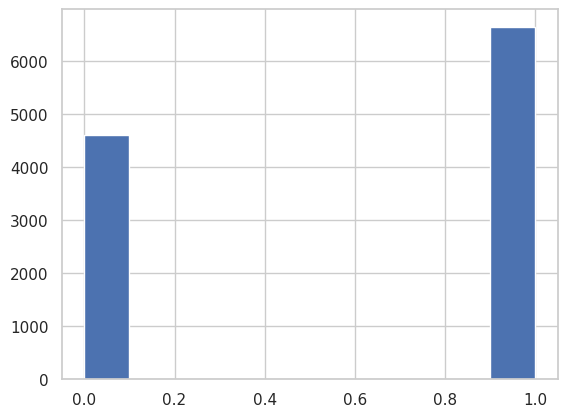

In [ ]:
df_clients.paperlessbilling.hist()

Asignamos la moda en la columna paymentmethod:

In [ ]:
moda_paymentmethod = df_clients['paymentmethod'].mode()[0]
df_clients['paymentmethod'].fillna(moda_paymentmethod, inplace=True)

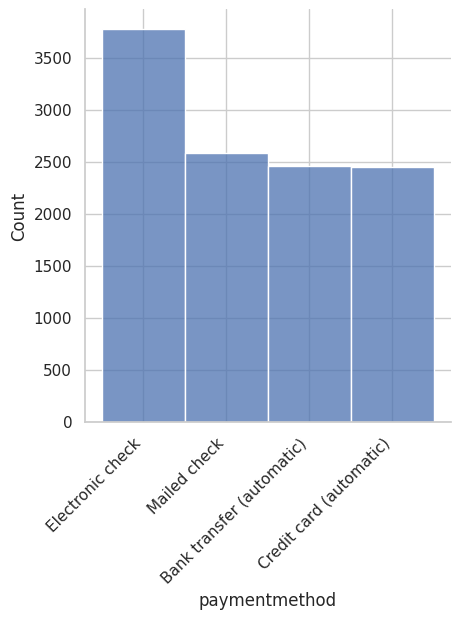

In [ ]:
import matplotlib.pyplot as plt

sns.displot(df_clients['paymentmethod'])
plt.xticks(rotation=45, ha='right')
plt.show()

Asignamos la moda en la columna married y asignamos valores binarios:

In [ ]:
moda_married = df_clients['married'].mode()[0]
df_clients['married'].fillna(moda_married, inplace=True)

df_clients['married'].replace({'Yes': 1, 'No': 0}, inplace=True)

<Axes: >

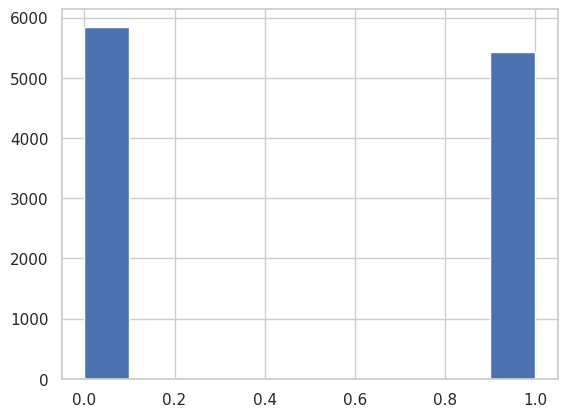

In [ ]:
df_clients.married.hist()

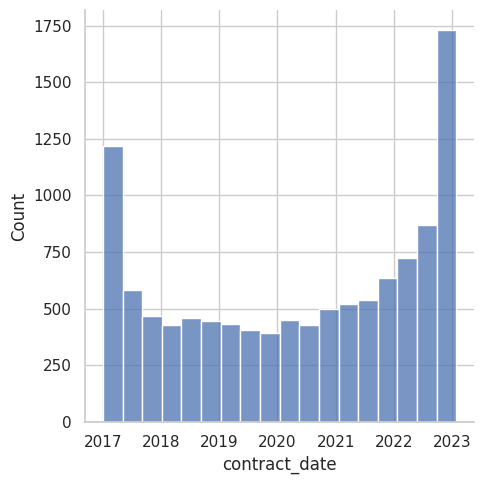

In [ ]:
sns.displot(df_clients['contract_date'])

Con la información de la columan "birth_date" decido crear una nueva columna con las edades de los clientes: Obsevamos que la edad modal es e 24 años.

In [ ]:
actualidad = 2023
df_clients['age'] = actualidad - df_clients['birth_date'].dt.year

In [ ]:
moda_edad = df_clients['age'].mode()[0]
print(moda_edad)

24


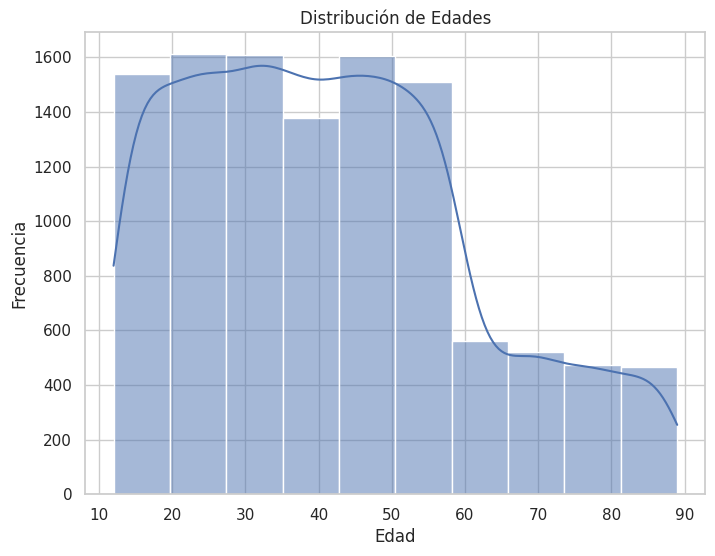

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clients, x='age', bins=10, kde=True)  # 'bins' define el número de barras, 'kde' agrega una estimación de densidad

plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

Con "churn_date" se tiene información de que 2958 clientes han abandonado  y los demás están marcados como NaT (indicando que NO han abandonado según los datos disponibles), hacemos lo siguiente:

- Creamos una nueva columna binaria indicando si el cliente abandonó o no, llamada "churn".

In [ ]:
import numpy as np
df_clients['churn'] = np.where(df_clients['churn_date'].notnull(), 1, 0)

<Axes: >

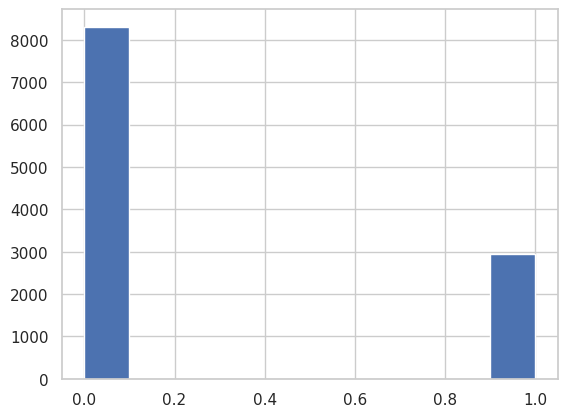

In [ ]:
df_clients.churn.hist()

In [ ]:
num_abandonados = df_clients[df_clients['churn'] == 1]['churn'].count()
num_vigentes = df_clients[df_clients['churn'] == 0]['churn'].count()

print(f"Número de abandonados: {num_abandonados}")
print(f"Número de vigentes: {num_vigentes}")

Número de abandonados: 2958
Número de vigentes: 8311


In [ ]:
df_clients

,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,birth_date,churn_date,country,zipcode,contract_channel,age,churn
0,3d40ba9d86cc7b97612628a924cd63bc,Female,1,Electronic check,0,2022-12-22,1,1975-05-01,NaT,ES,14576,None,48,0
1,ce8db6bfb9d902d89f9dc36eb1fc7df9,Male,0,Mailed check,0,2020-03-07,0,1984-04-01,NaT,ES,40071,Phone,39,0
2,5cf42e9ba3bfa476bc222bebcf63f1a8,Male,1,Mailed check,0,2022-11-07,0,2010-12-07,2023-05-13,ES,45466,None,13,1
3,84f664e4dcfa80ce511615bc91ca6692,Male,0,Bank transfer (automatic),0,2019-04-09,0,1994-08-08,NaT,ES,31420,None,29,0
4,0467f23d6b9e7891da40ed53339f5725,Female,1,Electronic check,0,2022-11-06,0,1973-08-02,2023-08-20,ES,10119,None,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,40603cfaa31765822d1555c74653ea60,Female,1,Electronic check,0,2022-12-24,1,1995-09-28,NaT,ES,14576,None,28,0
11265,4f7479fd8b8cb089cf02bbe3557c7656,Male,1,Electronic check,2,2022-12-17,1,1992-08-07,2023-06-17,ES,19605,None,31,1
11266,70c4cda7ec0c8a1c40056b1da9f75403,Male,0,Bank transfer (automatic),0,2022-11-09,0,2010-04-19,2023-08-02,ES,26622,None,13,1
11267,04608afff3c77e7cd2dfb7827fb656b7,Male,1,Electronic check,1,2021-09-11,0,1994-08-25,NaT,ES,28496,None,29,0


En la columna "country" hay solo 5 registros del païs "PT", se intuye que es Portugal, como estamos haciendo un análisis enfocado a los clientes, no discriminamos en base a la geografia y los incluimos.

In [ ]:
valores_diferentes_ES = df_clients[df_clients['country'] != 'ES']
valores_diferentes_ES

,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,birth_date,churn_date,country,zipcode,contract_channel,age,churn
2324,f6672f00f1d4aaa8a51245bb1e80ccb4,Female,1,Electronic check,0,2021-10-09,1,1963-10-16,2023-05-07,PT,None,None,60,1
4332,fa223bff9dc5a0b607d1b210c0630778,Female,0,Bank transfer (automatic),2,2018-07-11,1,1982-03-23,NaT,PT,None,None,41,0
6931,3a67c633129c8bb2da4afebba5ecf8d9,Male,0,Bank transfer (automatic),0,2018-03-21,0,1966-06-28,NaT,PT,None,Store,57,0
8110,4e68613fa3bb311633bb852311637fd0,Female,0,Bank transfer (automatic),2,2018-07-21,1,1989-04-19,NaT,PT,None,None,34,0
9649,4a61e1a870fb2593589913455228413f,Male,0,Bank transfer (automatic),0,2018-03-19,0,1984-06-11,NaT,PT,None,None,39,0


Creamos una nueva categoria llamda "No specified" que lo imputamos a los nulos de la columna "contract_channel", ya que en los valores nulos no se especifica cual es el canal de contratación del cliente.

In [ ]:
df_clients['contract_channel'].fillna('No specified', inplace=True)

In [ ]:
valores_unicos_contract_channel = df_clients['contract_channel'].unique()
print(valores_unicos_contract_channel)

['No specified' 'Phone' 'Internet' 'Store']


En cuanto al "zipcode", encontramos solo 5 nulos, que conciden que con que esos 5 son del país "PT" (Portugal), los vamos a eliminar.

In [ ]:
df_clients = df_clients.dropna(subset=['zipcode'])

Con los datos de "Zipcode" vamos a acrear una nueva columna llamada "provincia" que informará del nombre de la provincia de los cuales proviene nuestros clientes:

In [ ]:
# Entre CP y provincias, extraido de wikipedia (como son pocos datos, he decidido copiar y pegar en cambiar de hacer webscraping):
codigos_provincias = {
    '01': 'Álava',
    '02': 'Albacete',
    '03': 'Alicante',
    '04': 'Almería',
    '05': 'Ávila',
    '06': 'Badajoz',
    '07': 'Baleares',
    '08': 'Barcelona',
    '09': 'Burgos',
    '10': 'Cáceres',
    '11': 'Cádiz',
    '12': 'Castellón',
    '13': 'Ciudad Real',
    '14': 'Córdoba',
    '15': 'La Coruña',
    '16': 'Cuenca',
    '17': 'Gerona',
    '18': 'Granada',
    '19': 'Guadalajara',
    '20': 'Guipúzcoa',
    '21': 'Huelva',
    '22': 'Huesca',
    '23': 'Jaén',
    '24': 'León',
    '25': 'Lérida',
    '26': 'La Rioja',
    '27': 'Lugo',
    '28': 'Madrid',
    '29': 'Málaga',
    '30': 'Murcia',
    '31': 'Navarra',
    '32': 'Orense',
    '33': 'Asturias',
    '34': 'Palencia',
    '35': 'Las Palmas',
    '36': 'Pontevedra',
    '37': 'Salamanca',
    '38': 'Santa Cruz de Tenerife',
    '39': 'Cantabria',
    '40': 'Segovia',
    '41': 'Sevilla',
    '42': 'Soria',
    '43': 'Tarragona',
    '44': 'Teruel',
    '45': 'Toledo',
    '46': 'Valencia',
    '47': 'Valladolid',
    '48': 'Vizcaya',
    '49': 'Zamora',
    '50': 'Zaragoza',
    '51': 'Ceuta',
    '52': 'Melilla'
}

def asignar_provincia(codigo_postal):
    primeros_dos_digitos = codigo_postal[:2]
    return codigos_provincias.get(primeros_dos_digitos, 'Desconocido')

df_clients['provincia'] = df_clients['zipcode'].apply(asignar_provincia)

<ipython-input-51-39eb1950e045>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients['provincia'] = df_clients['zipcode'].apply(asignar_provincia)


In [ ]:
df_clients

,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,birth_date,churn_date,country,zipcode,contract_channel,age,churn,provincia
0,3d40ba9d86cc7b97612628a924cd63bc,Female,1,Electronic check,0,2022-12-22,1,1975-05-01,NaT,ES,14576,No specified,48,0,Córdoba
1,ce8db6bfb9d902d89f9dc36eb1fc7df9,Male,0,Mailed check,0,2020-03-07,0,1984-04-01,NaT,ES,40071,Phone,39,0,Segovia
2,5cf42e9ba3bfa476bc222bebcf63f1a8,Male,1,Mailed check,0,2022-11-07,0,2010-12-07,2023-05-13,ES,45466,No specified,13,1,Toledo
3,84f664e4dcfa80ce511615bc91ca6692,Male,0,Bank transfer (automatic),0,2019-04-09,0,1994-08-08,NaT,ES,31420,No specified,29,0,Navarra
4,0467f23d6b9e7891da40ed53339f5725,Female,1,Electronic check,0,2022-11-06,0,1973-08-02,2023-08-20,ES,10119,No specified,50,1,Cáceres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,40603cfaa31765822d1555c74653ea60,Female,1,Electronic check,0,2022-12-24,1,1995-09-28,NaT,ES,14576,No specified,28,0,Córdoba
11265,4f7479fd8b8cb089cf02bbe3557c7656,Male,1,Electronic check,2,2022-12-17,1,1992-08-07,2023-06-17,ES,19605,No specified,31,1,Guadalajara
11266,70c4cda7ec0c8a1c40056b1da9f75403,Male,0,Bank transfer (automatic),0,2022-11-09,0,2010-04-19,2023-08-02,ES,26622,No specified,13,1,La Rioja
11267,04608afff3c77e7cd2dfb7827fb656b7,Male,1,Electronic check,1,2021-09-11,0,1994-08-25,NaT,ES,28496,No specified,29,0,Madrid


En la columna "contract_date" encontramos que hay 11,236 fechas de contratación hasta el 31/10/2023. Lo que nos lleva a la siguiente conclusión:
- Hay 11,269 consumidores de los servicios de la empresa.
- Hay 11,236 clientes de nuestros servicios.

## 1.2 Ouliers df_clients

In [ ]:
df_clients.describe(include = "all")

<ipython-input-53-caba274658b7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_clients.describe(include = "all")
<ipython-input-53-caba274658b7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_clients.describe(include = "all")
<ipython-input-53-caba274658b7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_clients.describe(include = "all")


,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,birth_date,churn_date,country,zipcode,contract_channel,age,churn,provincia
count,11264,11264,11264.000000,11264,11264.000000,11231,11264.000000,11264,2957,11264,11264,11264,11264.000000,11264.000000,11264
unique,11264,3,NaN,4,NaN,1997,NaN,8845,196,1,6328,4,NaN,NaN,51
top,3d40ba9d86cc7b97612628a924cd63bc,Male,NaN,Electronic check,NaN,2022-12-27 00:00:00,NaN,1995-08-02 00:00:00,2023-06-09 00:00:00,ES,35016,No specified,NaN,NaN,Madrid
freq,1,5681,NaN,3774,NaN,47,NaN,5,28,11264,6,8512,NaN,NaN,259
first,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,1934-01-12 00:00:00,2023-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2023-01-28 00:00:00,NaN,2011-12-28 00:00:00,2023-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.590554,NaN,0.446911,NaN,0.481090,NaN,NaN,NaN,NaN,NaN,41.699574,0.262518,NaN
std,NaN,NaN,0.491753,NaN,0.738597,NaN,0.499664,NaN,NaN,NaN,NaN,NaN,19.350305,0.440022,NaN
min,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,26.000000,0.000000,NaN


No obvservo nungún indicio de outlier. Podemos asegurar que los datos de clientes son consistentes, ya que siguen una coehrencia en los datos.

El archivo se guarda en formato ".csv", que es altamente estándar y compatible con la visualización de datos (permitiendo que otros miembros del equipo lo abran fácilmente en Excel).

In [ ]:
df_clients.to_csv('df_clients.csv')

# 2. Datos de la facturación

## 2.1 Limpieza "Billing":

- Billing: contiene la facturación emitida a los clientes en todo el año 2023


In [ ]:
df_billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100780 entries, 0 to 100779
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customerid        100780 non-null  object 
 1   billing_date      100780 non-null  object 
 2   monthlycharges    100507 non-null  float64
 3   internetservice   100501 non-null  object 
 4   onlinesecurity    100575 non-null  object 
 5   onlinebackup      100530 non-null  object 
 6   deviceprotection  100562 non-null  object 
 7   techsupport       100534 non-null  object 
 8   phone_lines       100780 non-null  int64  
 9   streaming         100780 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.7+ MB


In [ ]:
df_billing

,customerid,billing_date,monthlycharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,phone_lines,streaming
0,3d40ba9d86cc7b97612628a924cd63bc,2023-01-31,29.85,DSL,No,Yes,No,No,0,No
1,3d40ba9d86cc7b97612628a924cd63bc,2023-02-28,29.85,DSL,No,Yes,No,No,0,No
2,3d40ba9d86cc7b97612628a924cd63bc,2023-03-31,29.85,DSL,No,Yes,No,No,0,No
3,3d40ba9d86cc7b97612628a924cd63bc,2023-04-30,35.82,DSL,No,Yes,No,No,0,No
4,3d40ba9d86cc7b97612628a924cd63bc,2023-05-31,35.82,DSL,No,Yes,No,No,0,No
...,...,...,...,...,...,...,...,...,...,...
100775,7aea14389aa3d73fd383221574f76778,2023-04-30,70.60,Fiber optic,No,No,No,No,1,No
100776,7aea14389aa3d73fd383221574f76778,2023-05-31,70.60,Fiber optic,No,No,No,No,1,No
100777,7aea14389aa3d73fd383221574f76778,2023-06-30,70.60,Fiber optic,No,No,No,No,1,No
100778,7aea14389aa3d73fd383221574f76778,2023-07-31,70.60,Fiber optic,No,No,No,No,1,No


In [ ]:
df_billing.describe(include="all")

,customerid,billing_date,monthlycharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,phone_lines,streaming
count,100780,100780,100507.000000,100501,100575,100530,100562,100534,100780.000000,100780
unique,11236,206,NaN,3,3,3,3,3,NaN,2
top,3d40ba9d86cc7b97612628a924cd63bc,2023-01-31,NaN,Fiber optic,No,No,No,No,NaN,No
freq,10,11236,NaN,41342,46562,41615,41867,46336,NaN,51201
mean,NaN,NaN,65.937841,NaN,NaN,NaN,NaN,NaN,1.317682,NaN
std,NaN,NaN,31.834821,NaN,NaN,NaN,NaN,NaN,0.642785,NaN
min,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,30.960000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,70.350000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,91.150000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


Asignamos al 'Yes' o 'No' de la columna "streaming",el valor '1' a 'Yes' y '0' a 'No'. Esto nos permite preparar los datos para su posible uso futuro en el entrenamiento de un modelo de inteligencia artificial u otros propósitos similares.

In [ ]:
df_billing["streaming"].unique()
df_billing['streaming'].replace({'Yes': 1, 'No': 0}, inplace=True)

En la columna 'internetservice', cuando se encuentra el tipo 'No', lo sustituyo por 'Others'. Esto se fundamenta en la suposición de que si no se especifica 'DSL' o 'Fiber Optic', se trata de otro servicio no relacionado con estos dos. Por lo tanto, se considera como otro servicio distinto (ayuda a que los datos tengan coherencia).

In [ ]:
df_billing["internetservice"].unique()

array(['DSL', 'Fiber optic', 'No', nan], dtype=object)

In [ ]:
df_billing['internetservice'].replace({'No': 'Others'}, inplace=True)

In [ ]:
df_billing.head(5)

,customerid,billing_date,monthlycharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,phone_lines,streaming
0,3d40ba9d86cc7b97612628a924cd63bc,2023-01-31,29.85,DSL,No,Yes,No,No,0,0
1,3d40ba9d86cc7b97612628a924cd63bc,2023-02-28,29.85,DSL,No,Yes,No,No,0,0
2,3d40ba9d86cc7b97612628a924cd63bc,2023-03-31,29.85,DSL,No,Yes,No,No,0,0
3,3d40ba9d86cc7b97612628a924cd63bc,2023-04-30,35.82,DSL,No,Yes,No,No,0,0
4,3d40ba9d86cc7b97612628a924cd63bc,2023-05-31,35.82,DSL,No,Yes,No,No,0,0


Voy a dejar los nulos intactos

## 2.2 Outliers df_billing

In [ ]:
df_billing.describe(include="all")

,customerid,billing_date,monthlycharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,phone_lines,streaming
count,100780,100780,100507.000000,100501,100575,100530,100562,100534,100780.000000,100780.000000
unique,11236,206,NaN,3,3,3,3,3,NaN,NaN
top,3d40ba9d86cc7b97612628a924cd63bc,2023-01-31,NaN,Fiber optic,No,No,No,No,NaN,NaN
freq,10,11236,NaN,41342,46562,41615,41867,46336,NaN,NaN
mean,NaN,NaN,65.937841,NaN,NaN,NaN,NaN,NaN,1.317682,0.491953
std,NaN,NaN,31.834821,NaN,NaN,NaN,NaN,NaN,0.642785,0.499938
min,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,30.960000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
50%,NaN,NaN,70.350000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
75%,NaN,NaN,91.150000,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000


No obvservo nungún indicio de outlier. Podemos asegurar que los datos de facturación son consistentes.

# 3. Datos de la permanencia

## 3.1 Limpieza "Tenure"
- Tenure: contiene la información relativa a los compromisos de permanencia durante el año 2023.

In [ ]:
df_tenure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26601 entries, 0 to 26600
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customerid      26601 non-null  object        
 1   date            26601 non-null  datetime64[ns]
 2   tenure_months   26601 non-null  int64         
 3   tenure_penalty  26601 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 831.4+ KB


In [ ]:
df_tenure.describe(include="all", datetime_is_numeric=True)

,customerid,date,tenure_months,tenure_penalty
count,26601,26601,26601.000000,26601.000000
unique,4189,NaN,NaN,NaN
top,167041637430b3d83cd801a7c43369c9,NaN,NaN,NaN
freq,10,NaN,NaN,NaN
mean,NaN,2023-05-14 20:26:42.887109376,5.459156,98.184654
min,NaN,2023-01-31 00:00:00,1.000000,10.000000
25%,NaN,2023-02-28 00:00:00,3.000000,44.500000
50%,NaN,2023-04-30 00:00:00,5.000000,84.040000
75%,NaN,2023-07-31 00:00:00,8.000000,138.460000
max,NaN,2023-10-31 00:00:00,14.000000,362.300000


- Hay outliers en "tenure_months" y posiblemente en "tenrnure_penalty"

In [ ]:
df_tenure

,customerid,date,tenure_months,tenure_penalty
0,3d40ba9d86cc7b97612628a924cd63bc,2023-01-31,6,89.17
1,3d40ba9d86cc7b97612628a924cd63bc,2023-02-28,5,74.31
2,3d40ba9d86cc7b97612628a924cd63bc,2023-03-31,4,59.45
3,3d40ba9d86cc7b97612628a924cd63bc,2023-04-30,3,44.59
4,3d40ba9d86cc7b97612628a924cd63bc,2023-05-31,2,29.72
...,...,...,...,...
26596,167041637430b3d83cd801a7c43369c9,2023-06-30,6,63.44
26597,167041637430b3d83cd801a7c43369c9,2023-07-31,5,52.87
26598,167041637430b3d83cd801a7c43369c9,2023-08-31,4,42.30
26599,167041637430b3d83cd801a7c43369c9,2023-09-30,3,31.72


## 3.2 Outliers df_tenure

No detecto ningún outlier en los datos de "tenure".

# 4. Cuestiones

## 4.1 Segmento principal de la compañía:


Analizamos la columna **monthlycharges** que representa los ingresos mensuales generados por los clientes.

Calculamos la suma total de los ingresos mensuales agrupados por el tipo de servicio:

In [ ]:
ingresos_por_servicio_2023 = df_billing.groupby('internetservice')['monthlycharges'].sum().sort_values(ascending=False)
ingresos_por_servicio_2023

internetservice
Fiber optic    3891497.12
DSL            2183183.80
Others          534687.35
Name: monthlycharges, dtype: float64

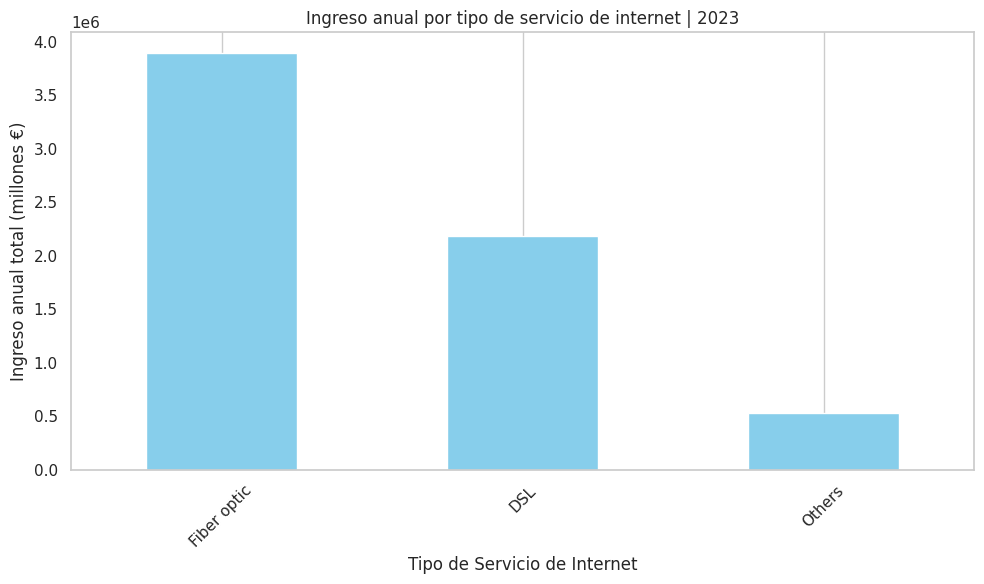

In [ ]:
# el gráfico de barras para mostrar los ingresos por tipo de servicio
plt.figure(figsize=(10, 6))
ingresos_por_servicio_2023.plot(kind='bar', color='skyblue')
plt.title('Ingreso anual por tipo de servicio de internet | 2023')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Ingreso anual total (millones €)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

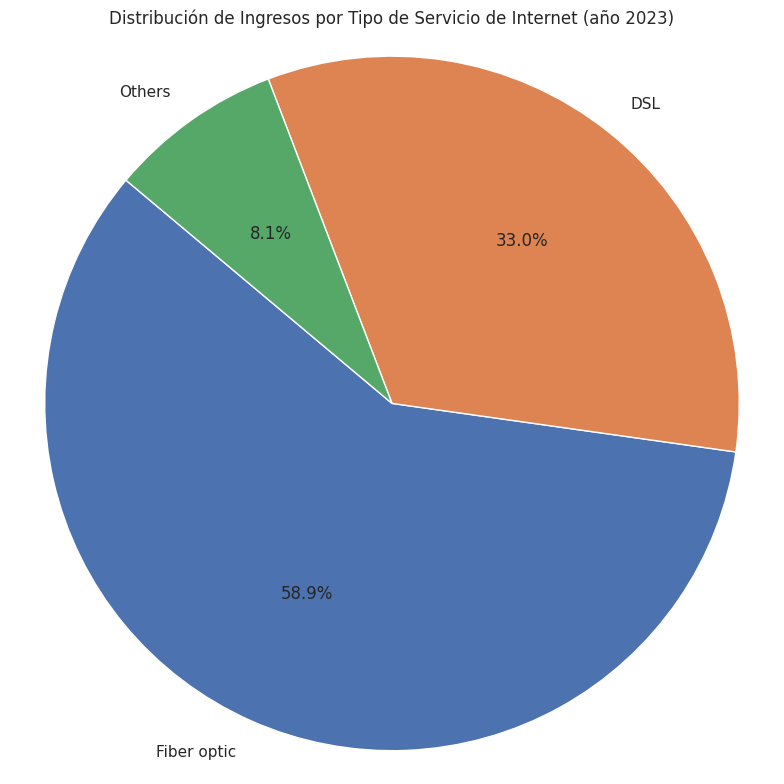

internetservice
Fiber optic    3891497.12
DSL            2183183.80
Others          534687.35
Name: monthlycharges, dtype: float64


In [ ]:
# gráfico circular:
plt.figure(figsize=(8, 8))
plt.pie(ingresos_por_servicio_2023, labels=ingresos_por_servicio_2023.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ingresos por Tipo de Servicio de Internet (año 2023)')

plt.axis('equal')  # Hace que el gráfico sea circular
plt.tight_layout()

plt.show()

print(ingresos_por_servicio_2023)

## 4.2 Clientes más propensos a irse de la compañía
¿Qué caracteriza a los clientes más propensos a irse de la compañía? Para responder a esta cuestión vamos a crear un perfil de cliente que es más propenso a abandonar el servicio en base a los datos geográficos y demográficos que disponemos:
- Geográficos: Província.
- Demográficos: Edad, sexo, estado civil y número de hijos.
- Datos de negocio: Tipo de servico con más abandono

In [ ]:
# Combinar df_clients con df_billing usando 'customerid'
df_merged_total = pd.merge(df_clients, df_billing, on='customerid', how='inner')

df_total = pd.merge(df_merged_total, df_tenure, on='customerid', how='inner')
df = df_merged_total.groupby('customerid').first().reset_index()

In [ ]:
df

,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,birth_date,churn_date,country,zipcode,contract_channel,age,churn,provincia,churn_month,billing_date,monthlycharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,phone_lines,streaming
0,000aa74f2769e670325b6e7e76805954,Female,1,Mailed check,0,2022-03-04,0,2004-04-20,NaT,ES,23222,No specified,19,0,Jaén,NaN,2023-01-31,24.50,Others,No internet service,No internet service,No internet service,No internet service,2,0
1,000b82991bd401c1315f9078727bbfa6,Female,1,Credit card (automatic),0,2017-10-17,0,1978-06-16,NaT,ES,32242,No specified,45,0,Orense,NaN,2023-01-31,109.85,Fiber optic,No,Yes,Yes,Yes,2,1
2,000d5a06a55dc4fbad11189d1d0c4ed9,Female,1,Electronic check,0,2021-04-04,0,1949-08-19,2023-09-04,ES,27315,No specified,74,1,Lugo,9.0,2023-01-31,94.25,Fiber optic,No,No,No,No,2,1
3,000dad6dae45218f7d4e711a1d126dc6,Female,1,Credit card (automatic),0,2021-07-22,1,1966-06-01,NaT,ES,13448,No specified,57,0,Ciudad Real,NaN,2023-01-31,95.95,Fiber optic,No,No,Yes,No,1,1
4,001092464bd85617c6da4dbaec642f30,Female,0,Credit card (automatic),0,2019-07-11,0,2000-05-03,NaT,ES,44307,No specified,23,0,Teruel,NaN,2023-01-31,66.50,DSL,No,No,Yes,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,ffe70b20bb6bcfdf0c18af450e520f2a,Male,1,Bank transfer (automatic),0,2020-09-22,0,1991-09-26,NaT,ES,25620,No specified,32,0,Lérida,NaN,2023-01-31,91.25,Fiber optic,No,Yes,No,Yes,1,1
11227,ffe815c8b04b06623d58b4f92c485578,Female,1,Electronic check,0,2022-11-28,0,1956-04-16,2023-04-26,ES,29340,No specified,67,1,Málaga,4.0,2023-01-31,70.65,Fiber optic,No,No,No,No,1,0
11228,ffe8524f8db7cf1cc8a9cd250969778f,Male,0,Bank transfer (automatic),1,2017-05-19,1,1988-10-13,NaT,ES,45588,No specified,35,0,Toledo,NaN,2023-01-31,25.40,Others,No internet service,No internet service,No internet service,No internet service,2,0
11229,fff08f410886528e8a441861d8ebe12e,Male,0,Mailed check,0,2022-12-15,0,1965-06-06,2023-07-21,ES,02222,No specified,58,1,Albacete,7.0,2023-01-31,20.15,Others,No internet service,No internet service,No internet service,No internet service,1,0


In [ ]:
pd.set_option('display.max_columns', None)
df_total

,customerid,gender,paperlessbilling,paymentmethod,children,contract_date,married,birth_date,churn_date,country,zipcode,contract_channel,age,churn,provincia,billing_date,monthlycharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,phone_lines,streaming,date,tenure_months,tenure_penalty
0,3d40ba9d86cc7b97612628a924cd63bc,Female,1,Electronic check,0,2022-12-22,1,1975-05-01,NaT,ES,14576,No specified,48,0,Córdoba,2023-01-31,29.85,DSL,No,Yes,No,No,0,0,2023-01-31,6,89.17
1,3d40ba9d86cc7b97612628a924cd63bc,Female,1,Electronic check,0,2022-12-22,1,1975-05-01,NaT,ES,14576,No specified,48,0,Córdoba,2023-01-31,29.85,DSL,No,Yes,No,No,0,0,2023-02-28,5,74.31
2,3d40ba9d86cc7b97612628a924cd63bc,Female,1,Electronic check,0,2022-12-22,1,1975-05-01,NaT,ES,14576,No specified,48,0,Córdoba,2023-01-31,29.85,DSL,No,Yes,No,No,0,0,2023-03-31,4,59.45
3,3d40ba9d86cc7b97612628a924cd63bc,Female,1,Electronic check,0,2022-12-22,1,1975-05-01,NaT,ES,14576,No specified,48,0,Córdoba,2023-01-31,29.85,DSL,No,Yes,No,No,0,0,2023-04-30,3,44.59
4,3d40ba9d86cc7b97612628a924cd63bc,Female,1,Electronic check,0,2022-12-22,1,1975-05-01,NaT,ES,14576,No specified,48,0,Córdoba,2023-01-31,29.85,DSL,No,Yes,No,No,0,0,2023-05-31,2,29.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255285,167041637430b3d83cd801a7c43369c9,Male,1,Bank transfer (automatic),0,2017-07-08,0,1984-04-16,NaT,ES,38578,Internet,39,0,Santa Cruz de Tenerife,2023-10-31,105.65,Fiber optic,Yes,No,Yes,Yes,1,1,2023-06-30,6,63.44
255286,167041637430b3d83cd801a7c43369c9,Male,1,Bank transfer (automatic),0,2017-07-08,0,1984-04-16,NaT,ES,38578,Internet,39,0,Santa Cruz de Tenerife,2023-10-31,105.65,Fiber optic,Yes,No,Yes,Yes,1,1,2023-07-31,5,52.87
255287,167041637430b3d83cd801a7c43369c9,Male,1,Bank transfer (automatic),0,2017-07-08,0,1984-04-16,NaT,ES,38578,Internet,39,0,Santa Cruz de Tenerife,2023-10-31,105.65,Fiber optic,Yes,No,Yes,Yes,1,1,2023-08-31,4,42.30
255288,167041637430b3d83cd801a7c43369c9,Male,1,Bank transfer (automatic),0,2017-07-08,0,1984-04-16,NaT,ES,38578,Internet,39,0,Santa Cruz de Tenerife,2023-10-31,105.65,Fiber optic,Yes,No,Yes,Yes,1,1,2023-09-30,3,31.72


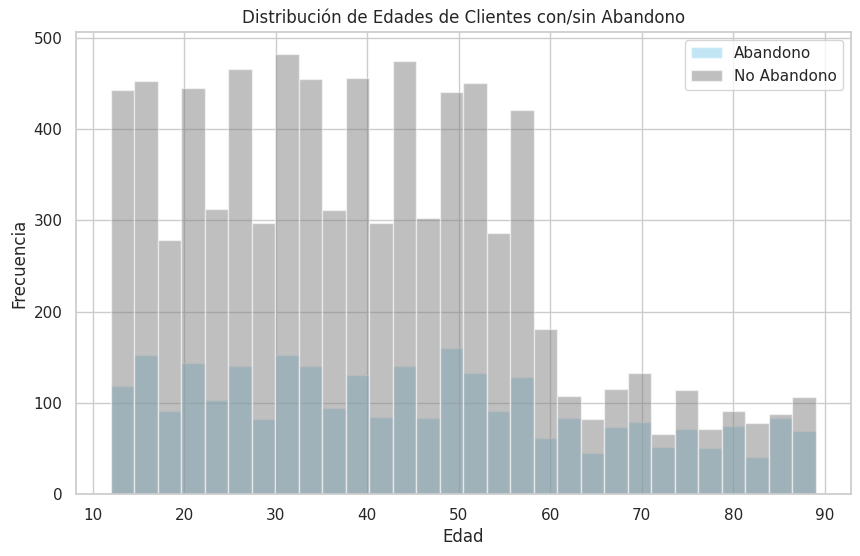

In [ ]:
#edad

abandonos = df_clients[df_clients['churn'] == 1]['age']
no_abandonos = df_clients[df_clients['churn'] == 0]['age']
plt.figure(figsize=(10, 6))

plt.hist(abandonos, bins=30, alpha=0.5, label='Abandono', color='skyblue') #no se porque me sale de color lila, es indiferente mientras se entienda el gráfico
plt.hist(no_abandonos, bins=30, alpha=0.5, label='No Abandono', color='grey')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de Clientes con/sin Abandono')
plt.legend()
plt.grid(True)

plt.show()


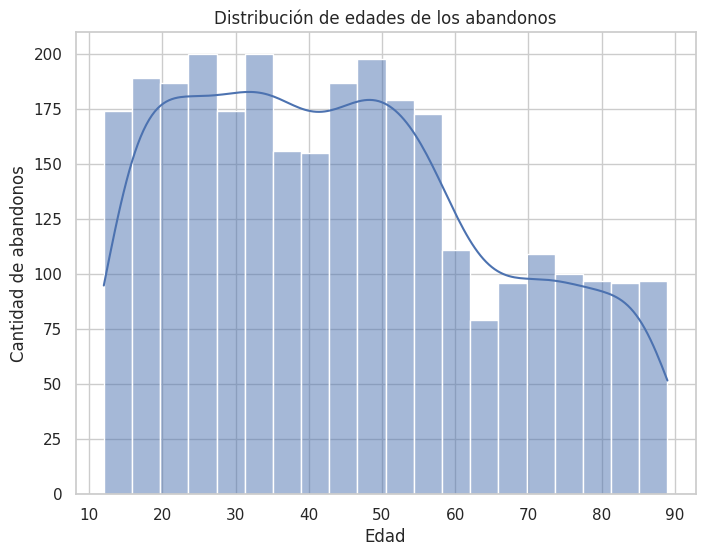

In [ ]:
# Histograma para la distribución de edades de los abandonos
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clients[df_clients['churn'] == 1], x='age', bins=20, kde=True)
plt.title('Distribución de edades de los abandonos')
plt.xlabel('Edad')
plt.ylabel('Cantidad de abandonos')
plt.show()

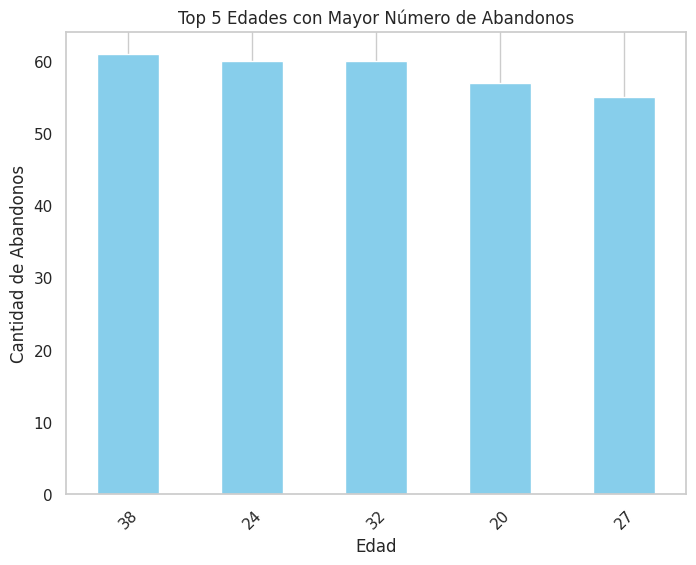

In [ ]:
import matplotlib.pyplot as plt

top_abandonos_por_edad = df_clients[df_clients['churn'] == 1]['age'].value_counts().head(5)

plt.figure(figsize=(8, 6))
top_abandonos_por_edad.plot(kind='bar', color='skyblue')

plt.title('Top 5 Edades con Mayor Número de Abandonos')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Abandonos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


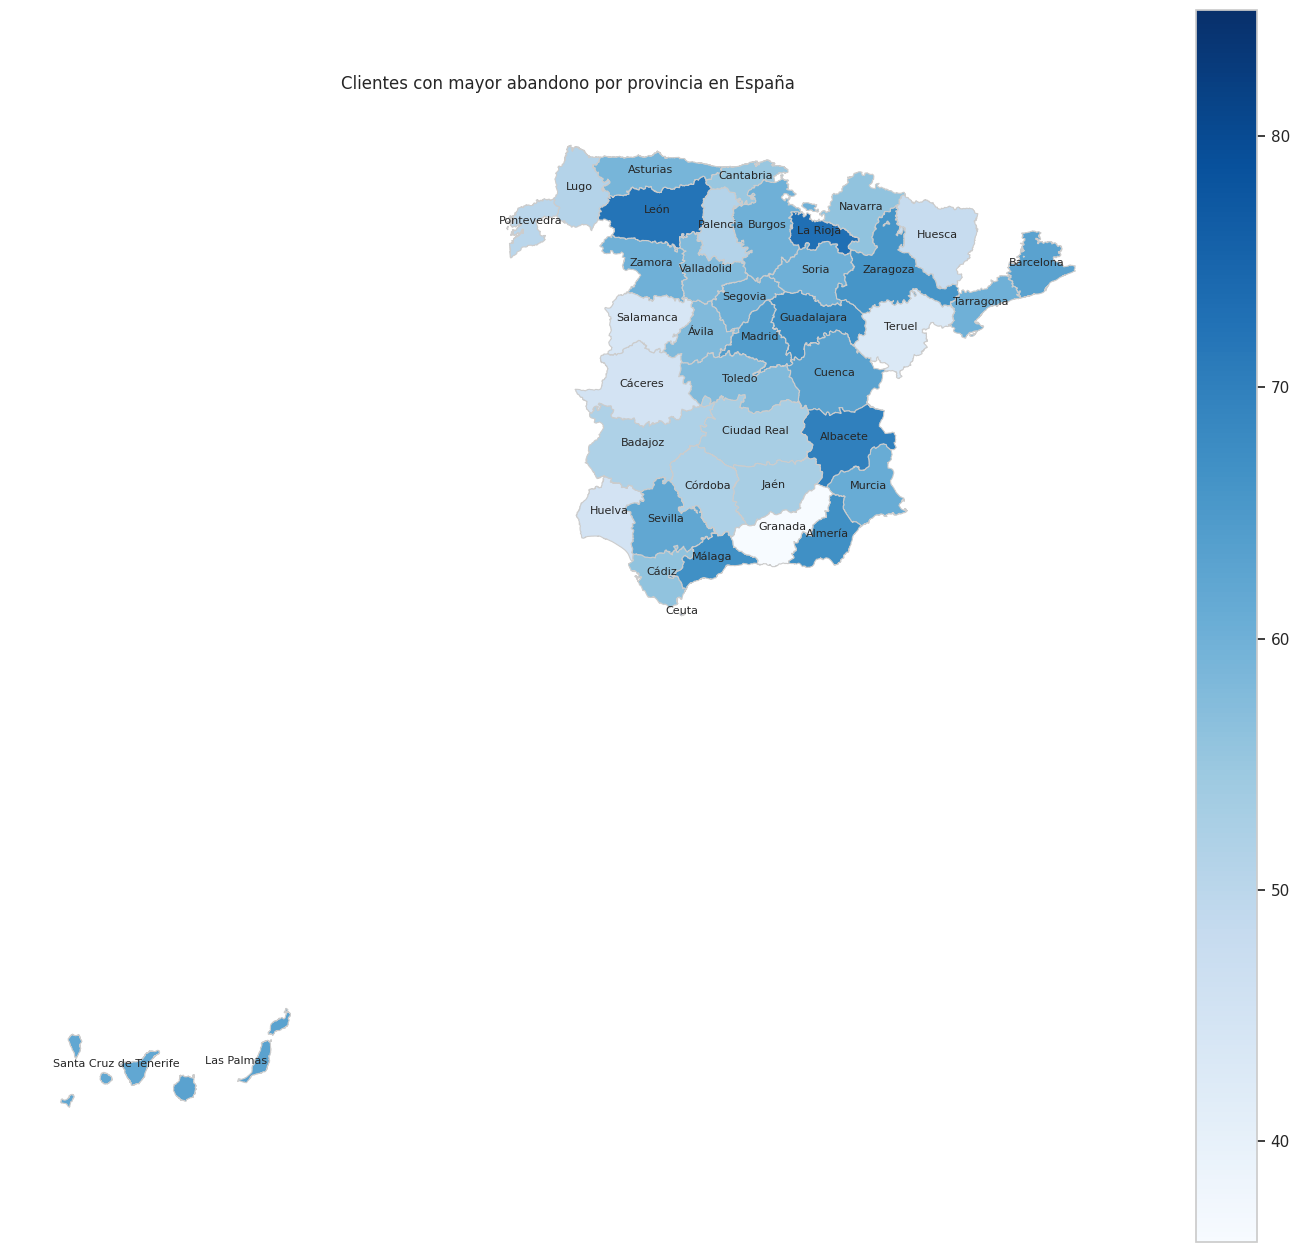

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

abandonos_por_provincia = df_clients[df_clients['churn'] == 1].groupby('provincia')['churn'].count().reset_index()

mapa_espana = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Fundamento_de_la_Ciencia_de_Datos/EDA | Actividad de aprendizaje 2/data/provincias-espanolas.geojson')

mapa_espana_con_abandonos = mapa_espana.merge(abandonos_por_provincia, how="inner")

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(18, 16))
mapa_espana_con_abandonos.plot(column='churn', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Clientes con mayor abandono por provincia en España')
plt.axis('off')  # Ocultar ejes

# Etiquetas de texto para nombres de provincias
for idx, row in mapa_espana_con_abandonos.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['provincia'], horizontalalignment='center', fontsize=8)

plt.show()


In [ ]:
top_5_churn = df_clients[df_clients['churn'] == 1]['provincia'].value_counts().head(5)
print("Top 5 provincias con más abandono:\n", top_5_churn)

Top 5 provincias con más abandono:
 Ceuta          85
La Rioja       73
León           72
Albacete       70
Guadalajara    67
Name: provincia, dtype: int64


Analizamos las tres categorias de los datos referente al genero (Hombre, Mujer y otros) mediante una tabla de contingencias tanto numérico como percentual:

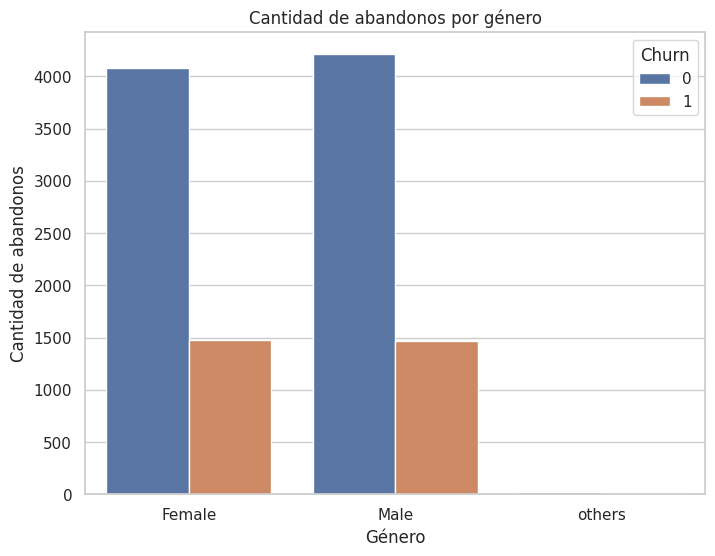

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df_clients, x='gender', hue='churn')
plt.title('Cantidad de abandonos por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de abandonos')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
# Tabla de contingencia:
tabla_contingencia = pd.crosstab(df_clients['gender'], df_clients['churn'], margins=True)
tabla_contingencia

churn,0,1,All
gender,,,
Female,4076,1476,5552
Male,4211,1470,5681
others,20,11,31
All,8307,2957,11264


In [ ]:
tabla_contingencia_porcentajes = pd.crosstab(df_clients['gender'], df_clients['churn'], normalize='index') * 100
tabla_contingencia_porcentajes

churn,0,1
gender,,
Female,73.414986,26.585014
Male,74.124274,25.875726
others,64.516129,35.483871


Los clientes que han abandonado son más propensos a no tener ningún hijo a cargo:

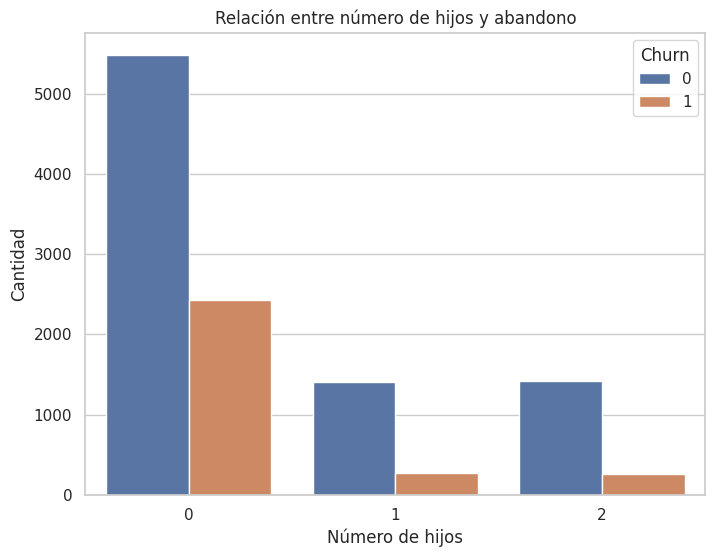

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para relación entre número de hijos y abandono
plt.figure(figsize=(8, 6))
sns.countplot(x='children', hue='churn', data=df_clients)
plt.title('Relación entre número de hijos y abandono')
plt.xlabel('Número de hijos')
plt.ylabel('Cantidad')
plt.legend(title='Churn', loc='upper right')
plt.show()


In [ ]:
proporcion_abandono_hijos = df_clients.groupby('children')['churn'].mean()
print("Proporción de abandono según número de hijos:\n", proporcion_abandono_hijos)

Proporción de abandono según número de hijos:
 children
0    0.306321
1    0.163082
2    0.155357
Name: churn, dtype: float64


Visualizamos si el estado civil influye en los abandonos de parte de los clientes:

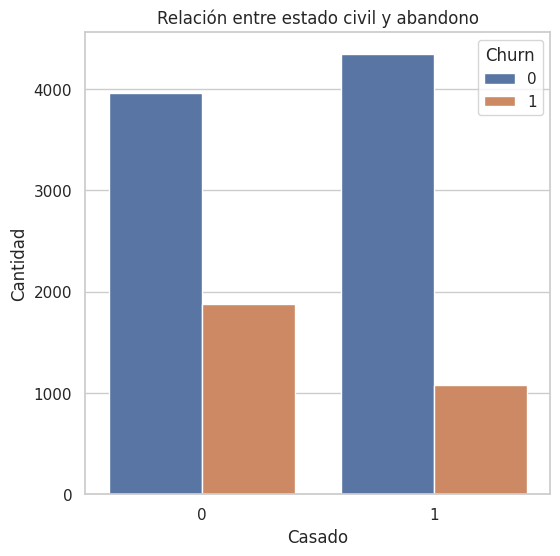

In [ ]:
# Gráfico de barras para relación entre estado civil (casado) y abandono
plt.figure(figsize=(6, 6))
sns.countplot(x='married', hue='churn', data=df_clients)
plt.title('Relación entre estado civil y abandono')
plt.xlabel('Casado')
plt.ylabel('Cantidad')
plt.legend(title='Churn', loc='upper right')
plt.show()


In [ ]:
proporcion_abandono_casado = df_clients.groupby('married')['churn'].mean()
print("Proporción de abandono según estado civil:\n", proporcion_abandono_casado)

Proporción de abandono según estado civil:
 married
0    0.321814
1    0.198561
Name: churn, dtype: float64


El servicio donde más abandono de clientes:

In [ ]:
df_churn_service = df_total[['customerid', 'churn', 'internetservice']].groupby('customerid').first().reset_index()

In [ ]:
df_churn_service

,customerid,churn,internetservice
0,000dad6dae45218f7d4e711a1d126dc6,0,Fiber optic
1,0019b3ed6a2a741ac2971152853e6e56,0,Others
2,0021e6f58a285c6415af5f8cd1521396,0,Fiber optic
3,0024ef9d9a0f7840e79a3b476eaeed60,1,Fiber optic
4,004f6098ebc2a66af3fd6959327a6e6a,0,Fiber optic
...,...,...,...
4183,ff83101132279b41a9a63bb3854bd311,0,DSL
4184,ff867be9eb4c98f6381ce238784e10ab,0,Fiber optic
4185,ffafd7fc1295683a3f058cee92bb20da,0,DSL
4186,ffc57bcb2616469825854111da135ead,0,Fiber optic


In [ ]:
df_abandono = df_churn_service[df_churn_service['churn'] == 1]
abandono_por_servicio = df_abandono['internetservice'].value_counts()
abandono_por_servicio

Fiber optic    758
DSL            257
Others          69
Name: internetservice, dtype: int64

## 4.3  Por qué se van los clientes? Cómo podríamos frenar su marcha?
Vamos a ver el grafico de correlación lineal entre los datos numéricos que disponemos:

<ipython-input-86-6b5bc2b3d95f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_total.corr(), annot=True)


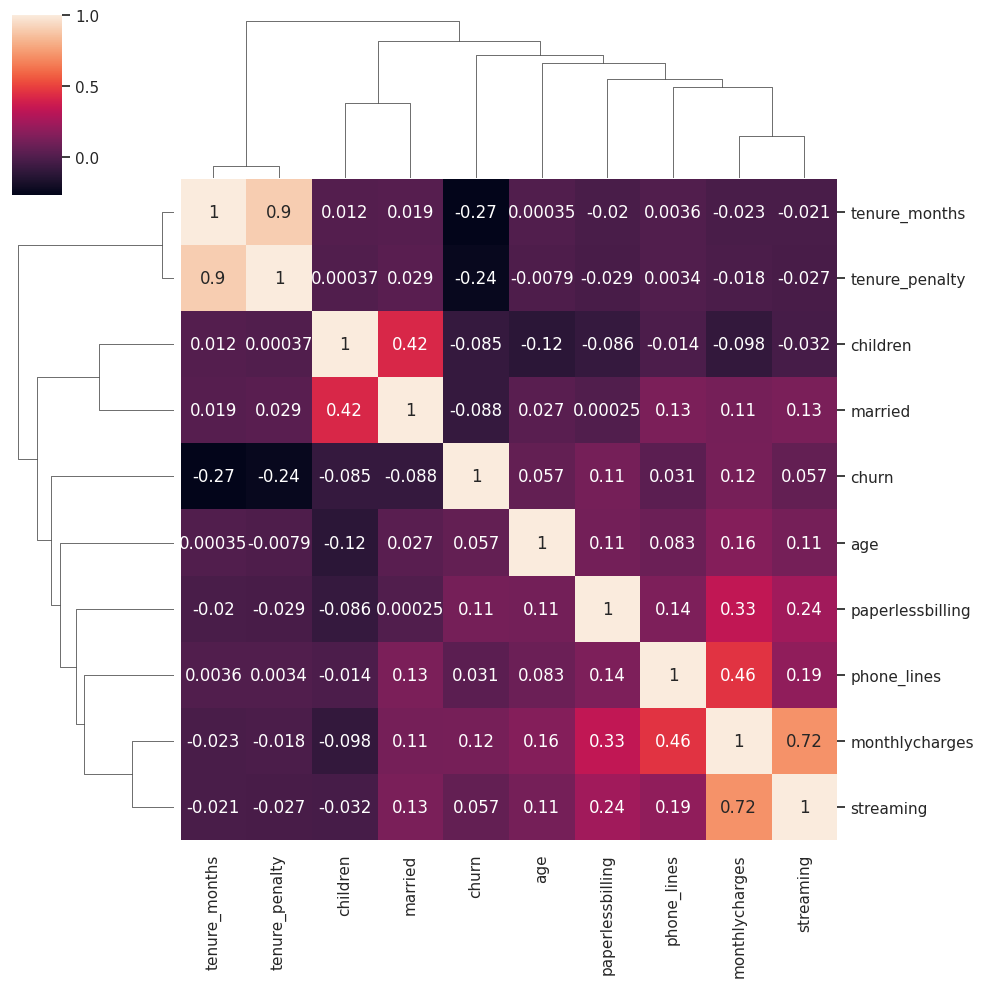

In [ ]:
sns.clustermap(df_total.corr(), annot=True)

Obvervamos que en la colmna "**churn**":
- Hay una correlación negativa (muy leve) con "**tenure_months**" y "**tenure_penalty**".
- Hay una correlación posititva (muy leve) con "**paperlessbillig**" y "**monthlycharges**"

Lo que nos sugiere que las condiciones de permanencia y el pago mensual de los servicios tiene que ver con los abandonos. Vamos a verlo con más detenimiento:

In [ ]:
abandono = df_total[['customerid', 'churn', 'tenure_months', 'tenure_penalty', 'monthlycharges']].groupby('customerid').first().reset_index()
abandono

,customerid,churn,tenure_months,tenure_penalty,monthlycharges
0,000dad6dae45218f7d4e711a1d126dc6,0,14,212.86,95.95
1,0019b3ed6a2a741ac2971152853e6e56,0,10,161.78,24.60
2,0021e6f58a285c6415af5f8cd1521396,0,4,83.36,115.15
3,0024ef9d9a0f7840e79a3b476eaeed60,1,3,72.81,85.45
4,004f6098ebc2a66af3fd6959327a6e6a,0,7,86.53,89.70
...,...,...,...,...,...
4183,ff83101132279b41a9a63bb3854bd311,0,11,201.72,84.80
4184,ff867be9eb4c98f6381ce238784e10ab,0,14,209.98,116.30
4185,ffafd7fc1295683a3f058cee92bb20da,0,12,181.90,54.75
4186,ffc57bcb2616469825854111da135ead,0,11,241.88,108.10


Análisis de la duración de permanencia (tenure_months). Podemos ver que los clientes que abandonan disponen de menos meses de permanencia:

In [ ]:
estadisticas_por_abandono_tenure_months = abandono.groupby('churn')['tenure_months'].describe()
estadisticas_por_abandono_tenure_months

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3104.0,8.512564,3.449909,1.0,6.0,8.0,12.0,14.0
1,1084.0,2.655904,1.535860,1.0,2.0,3.0,4.0,14.0


Análisis de penalización por permanencia (Tenure_penalty). Podemos ver que los clientes que han abandonado nuestros servicos han tenido una penalización monetaria menor que los que continuaron.

In [ ]:
estadisticas_por_abandono_tenure_penalty = abandono.groupby('churn')['tenure_penalty'].describe()
estadisticas_por_abandono_tenure_penalty

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3104.0,153.062870,74.660085,14.67,91.9475,144.23,202.7650,362.30
1,1084.0,47.936891,31.709688,10.13,23.9200,42.26,63.9575,299.21


Evaluación de cargos mensuales (Monthlycharges). Obvervamos que de media los clientes que han abandonado en 2023 han tenido un precio más elevado en sus facturas que los clientes que sigen actualemnte vigentes.

In [ ]:
estadisticas_por_abandono_Monthlycharges = abandono.groupby('churn')['monthlycharges'].describe()
estadisticas_por_abandono_Monthlycharges

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3104.0,61.024662,31.021594,18.25,25.1000,64.125,88.6125,118.65
1,1084.0,74.765913,24.931341,18.85,56.4125,79.900,94.4500,118.35


**¿Cómo podríamos frenar la marcha de futuros clientes? **
- **Proporcionar incentivos para la permanencia**: Ofrecer beneficios a largo plazo para clientes que permanezcan con el servicio durante más tiempo (Descuentos, promociones, ofertas especiales, etc.)
- **Ofrecer un descuento pronunciado** en su factura mensual a cambio de más meses de permanencia y un aumento en la penalización por abandono. En especial enfasis a los clientes que han aumentado progresivamente sus facturas mesnuales.


## 4.4 Campaña de retención

Primero es crucial identificar el segmento más propenso a abandonar (lo tenemos hecho en el apartado 4.2):

In [ ]:
df_abandono = df_churn_service[df_churn_service['churn'] == 1]
abandono_por_servicio = df_abandono['internetservice'].value_counts()
abandono_por_servicio

Fiber optic    758
DSL            257
Others          69
Name: internetservice, dtype: int64

Vamos a ver los meses en los cuales más abandono hay:

In [ ]:
df_clients['churn_month'] = df_clients['churn_date'].dt.month
abandono_por_mes = df_clients['churn_month'].value_counts().sort_index()
abandono_por_mes

<ipython-input-98-505ee804b237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients['churn_month'] = df_clients['churn_date'].dt.month


3.0    375
4.0    423
5.0    419
6.0    425
7.0    437
8.0    428
9.0    450
Name: churn_month, dtype: int64

Como el segmento más propenso es **Fiber optic** enfocaremos nuestra Campaña de retención en ese segmento. La campaña consistirá en un descuento atractivo (10%) solo a los clientes que tengan el servicio de **Fiber optic** contratado y la campaña se lanzará un més antes del mes con más abandonos (**Septiembre**).

Por lo tanto la campaña tendrá una duración de 1 mes, iniciando el 01/08 y finalizando el 01/09. El impacto en la facturación será la siguiente:

In [ ]:
# Convertir 'billing_date' al formato datetime si no está en ese formato para poder indicar el mes
df_total['billing_date'] = pd.to_datetime(df_total['billing_date'])

# Filtrar el DataFrame para considerar solo los clientes con servicio Fiber optic y el mes de septiembre
df_fiber_optic_septiembre = df_total[(df_total['internetservice'] == 'Fiber optic') & (df_total['billing_date'].dt.month == 9)]

# Calcular el descuento del 10% sobre la mensualidad para los clientes con servicio Fiber optic
descuento_10_porciento = df_fiber_optic_septiembre['monthlycharges'] * 0.1

# Calcular el impacto en la facturación sabiendo que el descuento durante el mes de la campaña (agosto)
impacto_facturacion = descuento_10_porciento.sum()

print(f"El impacto en la facturación debido al descuento del 10% sobre la mensualidad de Fiber optic durante la campaña (agosto) es de: - {impacto_facturacion:.2f} €")


El impacto en la facturación debido al descuento del 10% sobre la mensualidad de Fiber optic durante la campaña (agosto) es de: - 84146.78 €


In [ ]:
# Calcular el gasto promedio mensual por cliente perdido
gasto_promedio_cliente_perdido = df_total[df_total['churn'] == 1]['monthlycharges'].mean()

# Calcular el dinero ahorrado si la campaña evitó la pérdida de 450 clientes
dinero_ahorrado = gasto_promedio_cliente_perdido * 450

print(f"Si la campaña fue efectiva y evitó la pérdida de 450 clientes, el dinero ahorrado sería de: {dinero_ahorrado:.2f} €")


Si la campaña fue efectiva y evitó la pérdida de 450 clientes, el dinero ahorrado sería de: 35311.43 €


In [ ]:
 #Guradamos EN html:
 %%shell
 jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Fundamento_de_la_Ciencia_de_Datos/EDA | Actividad de aprendizaje 2/EDA | Actividad de aprendizaje 2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Fundamento_de_la_Ciencia_de_Datos/EDA | Actividad de aprendizaje 2/EDA | Actividad de aprendizaje 2.ipynb to html
[NbConvertApp] Writing 1802763 bytes to /content/drive/MyDrive/Colab Notebooks/Fundamento_de_la_Ciencia_de_Datos/EDA | Actividad de aprendizaje 2/EDA | Actividad de aprendizaje 2.html
